## 회전

In [5]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def draw(img, text):
    plt.imshow(img)
    plt.title(text)
    plt.show()

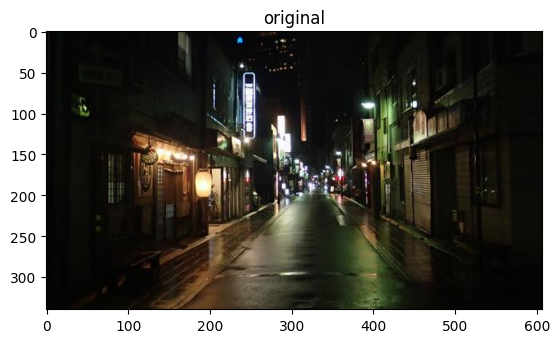

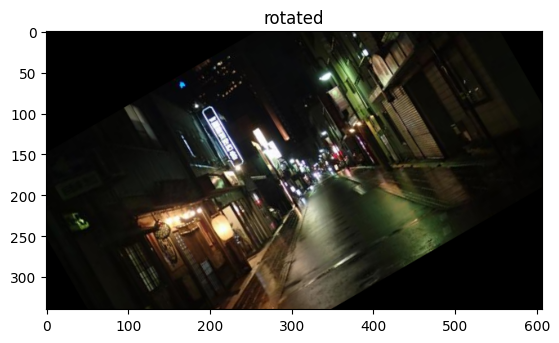

In [7]:
img_path = '../data/dark.png'
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#회전할 각도
angle = 30

#이미지 중심점 기준 회전 행렬 생성
(h,w) = image.shape[:2]
center = (w//2,h//2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)

#회전 적용
rotated = cv2.warpAffine(image, M, (w,h))

#원본과 비교
draw(image, 'original')
draw(rotated, 'rotated')

## 이동

[[ 1.  0. 30.]
 [ 0.  1. 70.]]


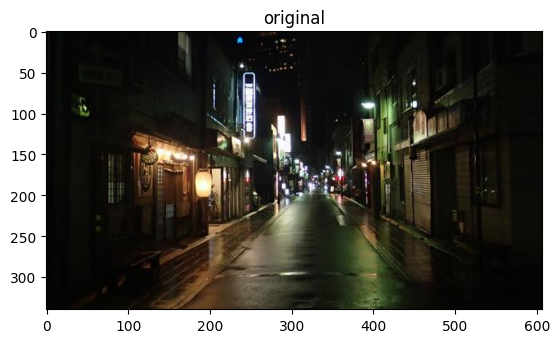

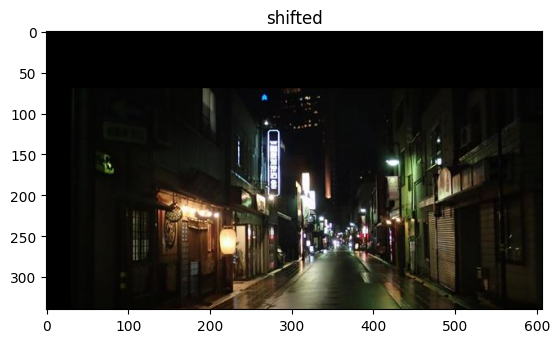

In [8]:
#이동할 거리 설정(x,y)
shift = (30,70)

#변환 행렬 생성
M = np.float32([[1, 0, shift[0]],
               [0, 1, shift[1]]])
print(M)

#이동 변환 적용
shifted =  cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

#비교 출력
draw(image,'original')
draw(shifted,'shifted')

## 확대/축소

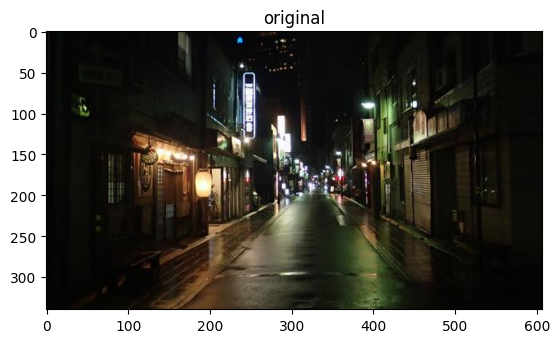

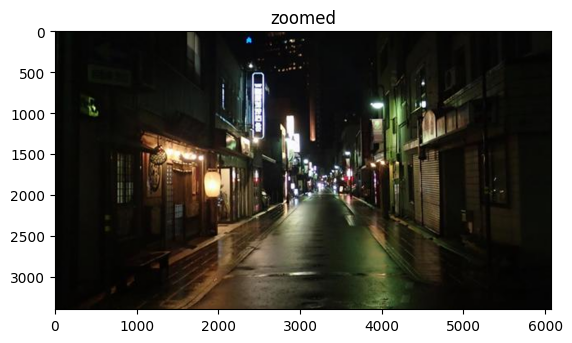

In [9]:
#확대/축소 스케일 설정
zoom_scale = 10

zoomed = cv2.resize(image, (w*zoom_scale, h*zoom_scale),
                    interpolation= cv2.INTER_CUBIC)

#비교
draw(image, 'original')
draw(zoomed, 'zoomed')

이미지 크기가 변경됨

## 반전

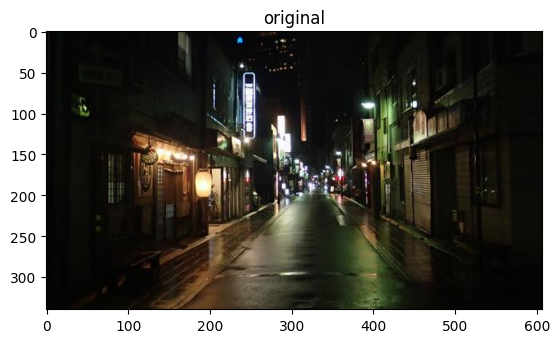

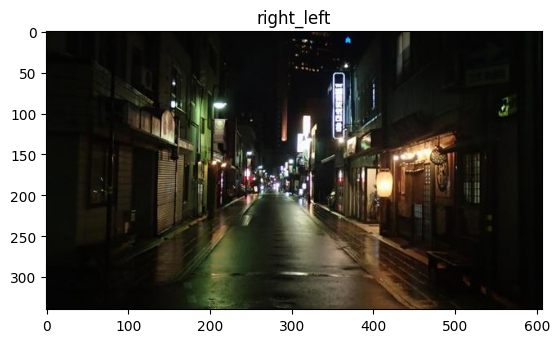

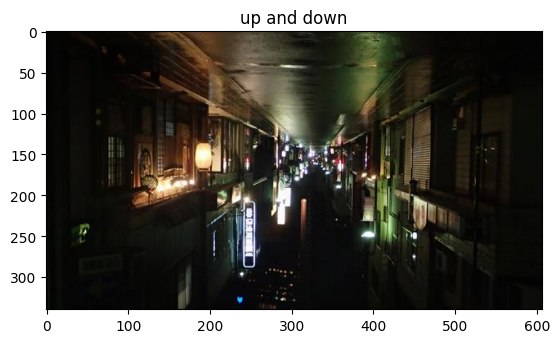

In [10]:
#좌우 반전
#1. 좌우 / 0. 상하
flipped_1 = cv2.flip(image, 1)
flipped_0 = cv2.flip(image, 0)

draw(image,'original')
draw(flipped_1,'right_left')
draw(flipped_0,'up and down')


## 노이즈 추가

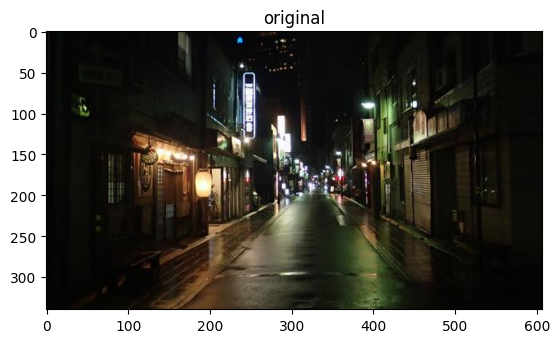

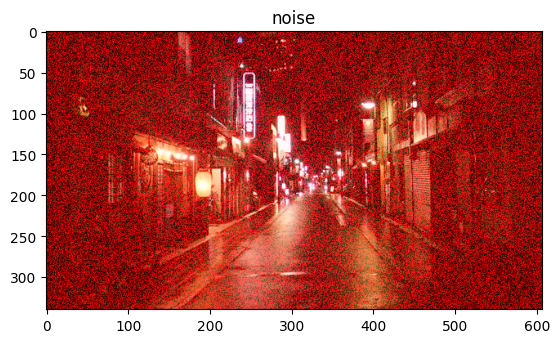

In [11]:
#Noise 추가
noise = np.zeros(image.shape, np.uint8)
cv2.randu(noise, 0, 255)
black = noise < 30
white = noise > 225
# print(noise)
# print(noise.shape)

#각 채널별 노이즈 추가
noise_b = noise[:, :, 0]
noise_g = noise[:, :, 1]
noise_r = noise[:, :, 2]
noise_img = cv2.merge([cv2.add(image[:,:,0], noise_b),
                        cv2.add(image[:,:,1], noise_g),
                          cv2.add(image[:,:,2], noise_r)])

#비교
draw(image,'original')
draw(noise_img,'noise')

(340, 607, 3)


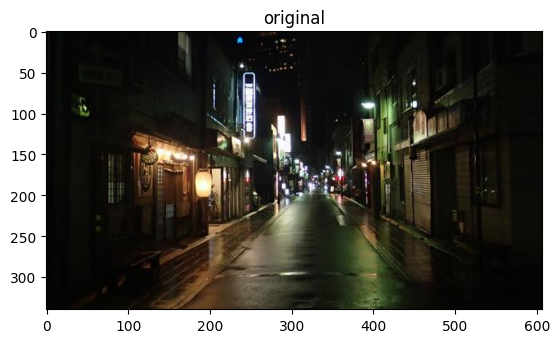

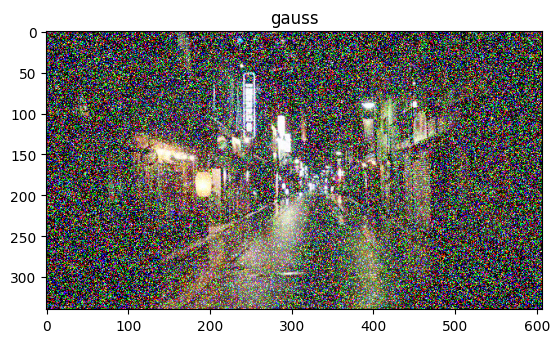

In [12]:
# Gaussian Noise
mean = 0
var =70
sigma = var ** 0.08
gauss = np.random.normal(mean, sigma, image.shape)
#gauss = gauss.reshape(image.shape).astype('uint8')
gauss = gauss.astype('uint8')
print(gauss.shape)

#이미지 적용
gauss_noise_img = cv2.add(image, gauss)

#비교
draw(image, 'original')
draw(gauss_noise_img, 'gauss')

## 색조

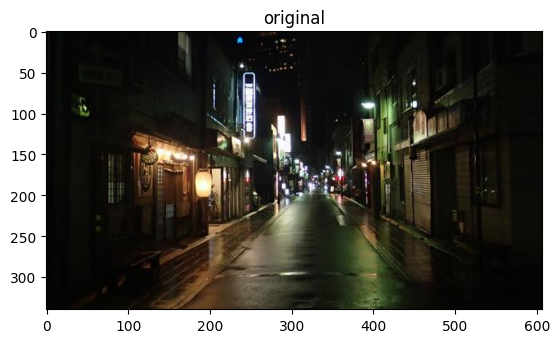

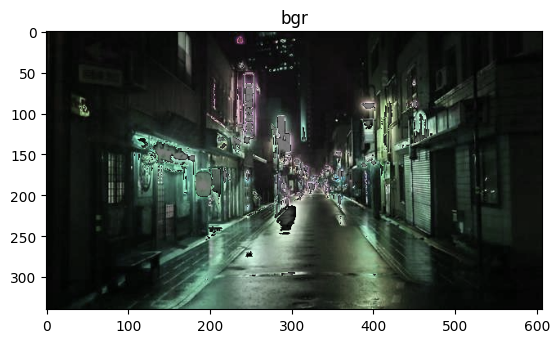

In [26]:
#색조 (HUE)값 변경
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

hue_shift = 30  #시계 방향으로 30도 색조 변경
hsv_image[:,:, 0] += hue_shift  
hsv_image[:,:, 1] = np.uint8(hsv_image[:,:, 1] * 0.5)    #채도
hsv_image[:,:, 2] = np.uint8(hsv_image[:,:, 2] * 1.5)    #명도

#HSV -> RGB
bgr_img = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

#비교
draw(image,'original')
draw(bgr_img,'bgr')


## 크롭

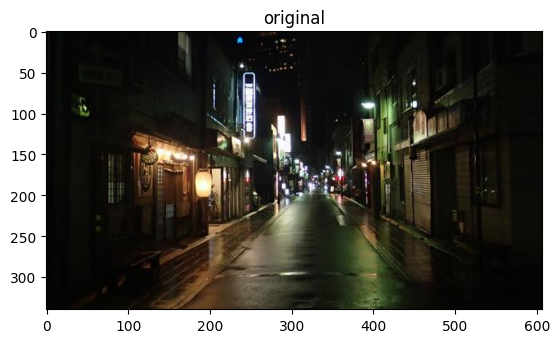

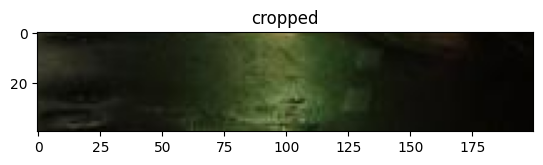

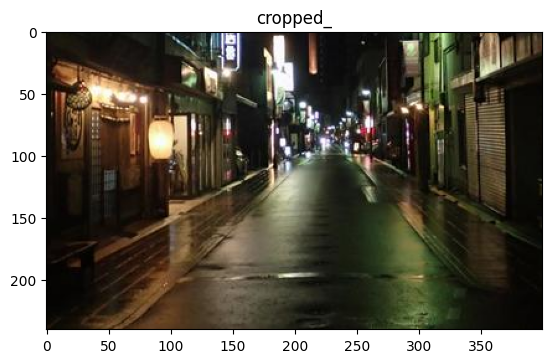

In [29]:
#잘라낼 크기 설정
x, y, w, h = 300, 300, 200, 200
#(x,y)를 기점으로 (w,h)만큼 오른쪽 아래로 간 크기 자름
cropped = image[y:y+h, x:x+w]

#(x,y)를 중심으로 2w, 2h 크기로 자름
cropped_ = image[y-h:y+h, x-w:x+w]

#비교
draw(image,'original')
draw(cropped,'cropped')
draw(cropped_,'cropped_')

## WarpAffine


In [35]:
#이미지 이동
M = np.float32([[1,0,50],
              [0,1,100]])   #x축으로 50, y축으로 100
shift = cv2.warpAffine(image,M,(image.shape[1],image.shape[0]))
print(M)
print(shift.shape)

#이미지 회전
M = cv2.getRotationMatrix2D((image.shape[1]/2,image.shape[0]/2),45,1)
rotated = cv2.warpAffine(image,M,(image.shape[1],image.shape[0]))
print(M)
print(rotated.shape)

[[  1.   0.  50.]
 [  0.   1. 100.]]
(340, 607, 3)
[[  0.70710678   0.70710678 -31.31506089]
 [ -0.70710678   0.70710678 264.39875529]]
(340, 607, 3)
